#Primer Parcial
<strong>Estudiante:</strong> Luis Fernando Romero Taboada<br>
<strong>CU:</strong> 35-5328<br>
<strong>Carrera:</strong>Ingenieria de Sistemas

<strong>Dataset:</strong> https://www.kaggle.com/datasets/mohamedafsal007/house-price-dataset-of-india

##Montamos el Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Ya que el Dataset no contaba con clasificacion, agregamos la columna clasificacion que cuenta con las clases del 0 al 4, un total de 5 clases cada uno va dirigido a un rango de precios de las casas

In [2]:
import numpy as np
import pandas as pd

# Cargar el dataset
dataset = pd.read_csv("/content/drive/MyDrive/datasets/MisDatasets/House_Price_India.csv")

dataset.head()

## verificamos el precio mas alto y mas bajo de las casas
print(dataset['Price'].max(), dataset['Price'].min())

# Filtrar el dataset para obtener solo las casas con precios en el rango
rango_razonable = dataset[(dataset['Price'] >= 78000) & (dataset['Price'] <= 300000)]
rango_moderado = dataset[(dataset['Price'] >= 300001) & (dataset['Price'] <= 400000)]
rango_alto = dataset[(dataset['Price'] >= 400001) & (dataset['Price'] <= 525000)]
rango_muyalto = dataset[(dataset['Price'] >= 525001) & (dataset['Price'] <= 725000)]
rango_lujoextremo = dataset[(dataset['Price'] >= 725001) & (dataset['Price'] <= 7700000)]

# Contar cuántos datos están en ese rango
cantidad_razonable = rango_razonable.shape[0]
cantidad_moderado = rango_moderado.shape[0]
cantidad_alto = rango_alto.shape[0]
cantidad_muyalto = rango_muyalto.shape[0]
cantidad_lujoextremo = rango_lujoextremo.shape[0]

print(f'Cantidad de casas en el rango de 78000 a 300000: {cantidad_razonable}')
print(f'Cantidad de casas en el rango de 300001 a 400000: {cantidad_moderado}')
print(f'Cantidad de casas en el rango de 400001 a 525000: {cantidad_alto}')
print(f'Cantidad de casas en el rango de 525001 a 725000: {cantidad_muyalto}')
print(f'Cantidad de casas en el rango de 725001 a 7700000: {cantidad_lujoextremo}')

# Agregamos una columna para definir las clases segun un rango de precio, lambda define una funcion anonima
dataset["Clasificacion"] = dataset['Price'].apply(lambda x: 0 if x in range(78000, 300001)
                                                            else 1 if x in range(300001, 400001)
                                                            else 2 if x in range(400001, 525001)
                                                            else 3 if x in range(525001, 725001)
                                                            else 4)

# Creamos una copia del dataset ya incorporado la columna
data = dataset.copy()
data

7700000 78000
Cantidad de casas en el rango de 78000 a 300000: 3113
Cantidad de casas en el rango de 300001 a 400000: 2875
Cantidad de casas en el rango de 400001 a 525000: 2987
Cantidad de casas en el rango de 525001 a 725000: 2946
Cantidad de casas en el rango de 725001 a 7700000: 2699


,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,Clasificacion
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,0,122003,52.8645,-114.557,2880,5400,2,58,2380000,4
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,0,122004,52.8878,-114.470,2470,4000,2,51,1400000,4
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,0,122004,52.8852,-114.468,2940,6600,1,53,1200000,4
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,0,122005,52.9532,-114.321,3350,42847,3,76,838000,4
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,0,122006,52.9047,-114.485,2060,4500,1,51,805000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,0,122066,52.6191,-114.472,2250,17286,3,76,221700,0
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,0,122072,52.5075,-114.393,1540,7480,3,59,219200,0
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,0,122056,52.7289,-114.507,1130,6120,2,64,209000,0
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,0,122042,52.7157,-114.411,1420,6631,3,54,205000,0


## 1. Inserte atributos que contengan, caracteres, texto, valores booleanos relacionados a la temática del dataset elegido.

In [3]:
# Generar atributo tipo caracter ficticio
data['Tipo de Escuela'] = data['Number of schools nearby'].apply(lambda x: 'A' if x == 1
                                                          else 'B' if x == 2
                                                          else 'C')

# Generar atributo de texto ficticio
data['Estado neutral'] = data['condition of the house'].apply(lambda x: 'Muy deteriorado' if x == 1
                                                              else 'Deteriorado' if x == 2
                                                              else 'Regular' if x == 3
                                                              else 'Buen estado' if x == 4
                                                              else 'Excelente estado')

# Generar valores Booleanos
data['Cerca del Aeropuerto'] = data['Distance from the airport'].apply(lambda x: 1 if x in range(50,66) else 0)

data

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,Clasificacion,Tipo de Escuela,Estado neutral,Cerca del Aeropuerto
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,-114.557,2880,5400,2,58,2380000,4,B,Excelente estado,1
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,-114.470,2470,4000,2,51,1400000,4,B,Excelente estado,1
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,-114.468,2940,6600,1,53,1200000,4,A,Regular,1
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,-114.321,3350,42847,3,76,838000,4,C,Regular,0
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,-114.485,2060,4500,1,51,805000,4,A,Buen estado,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,-114.472,2250,17286,3,76,221700,0,C,Buen estado,0
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,-114.393,1540,7480,3,59,219200,0,C,Buen estado,1
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,-114.507,1130,6120,2,64,209000,0,B,Regular,1
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,-114.411,1420,6631,3,54,205000,0,C,Buen estado,1


##2. Duplique los ejemplos del dataset considerando rangos y criterios que garanticen la consistencia del dataset.

In [4]:
# Duplicar el dataset con variaciones mínimas en los valores de los píxeles
data_duplicado = data.copy()
print('Dataset original')
print(data_duplicado.shape)

# generar matriz de numeros aleatorios con distribucion normal, con media de 0 y desviacion estandar 0.05
data_duplicado.iloc[:, :23] += np.random.normal(0, 0.05, size=(data_duplicado.shape[0], 23))

# Concatenar el dataset original y duplicado
synthetic_dataset = pd.concat([data, data_duplicado], ignore_index=True) # reorganizar el dataframe para no tener indices repetidos

print('Datos del Dataset sintetico')
print(synthetic_dataset.shape)
synthetic_dataset


Dataset original
(14620, 27)
Datos del Dataset sintetico
(29240, 27)


,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,Clasificacion,Tipo de Escuela,Estado neutral,Cerca del Aeropuerto
0,6.762810e+09,42491.000000,5.000000,2.500000,3650.000000,9050.000000,2.000000,0.000000,4.000000,5.000000,...,-114.557000,2880.000000,5400.000000,2.000000,58.000000,2.380000e+06,4,B,Excelente estado,1
1,6.762811e+09,42491.000000,4.000000,2.500000,2920.000000,4000.000000,1.500000,0.000000,0.000000,5.000000,...,-114.470000,2470.000000,4000.000000,2.000000,51.000000,1.400000e+06,4,B,Excelente estado,1
2,6.762811e+09,42491.000000,5.000000,2.750000,2910.000000,9480.000000,1.500000,0.000000,0.000000,3.000000,...,-114.468000,2940.000000,6600.000000,1.000000,53.000000,1.200000e+06,4,A,Regular,1
3,6.762813e+09,42491.000000,4.000000,2.500000,3310.000000,42998.000000,2.000000,0.000000,0.000000,3.000000,...,-114.321000,3350.000000,42847.000000,3.000000,76.000000,8.380000e+05,4,C,Regular,0
4,6.762813e+09,42491.000000,3.000000,2.000000,2710.000000,4500.000000,1.500000,0.000000,0.000000,4.000000,...,-114.485000,2060.000000,4500.000000,1.000000,51.000000,8.050000e+05,4,A,Buen estado,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29235,6.762830e+09,42734.070322,1.985829,1.555405,1555.930781,20000.069317,0.982744,0.016014,-0.038219,4.007172,...,-114.511631,2249.950773,17285.944391,3.002478,75.981619,2.217000e+05,0,C,Buen estado,0
29236,6.762830e+09,42733.982595,2.986075,1.972668,1680.020115,6999.994526,1.450096,-0.022127,0.028378,3.975486,...,-114.498429,1540.066562,7480.020755,3.002843,58.983805,2.192001e+05,0,C,Buen estado,1
29237,6.762831e+09,42734.017188,1.980795,0.981985,1070.024979,6120.026758,0.957302,-0.124431,0.009509,3.002060,...,-114.520970,1130.024477,6119.994966,1.948927,64.019654,2.090000e+05,0,B,Regular,1
29238,6.762831e+09,42734.027890,4.053766,0.940728,1030.000403,6621.037092,1.007391,0.009366,-0.017322,4.043648,...,-114.473182,1419.960239,6630.931336,2.997339,54.039649,2.050000e+05,0,C,Buen estado,1


In [5]:
# Guardamos el dataset sintetico en nuestro almacenamiento

synthetic_dataset.to_csv('/content/drive/MyDrive/datasets/MisDatasets/House_Price_India_synthetic.csv', index=False)

##3. Crear una grafica representativa de los datos del dataset inicial y otra con los datos del dataset sintético generado.

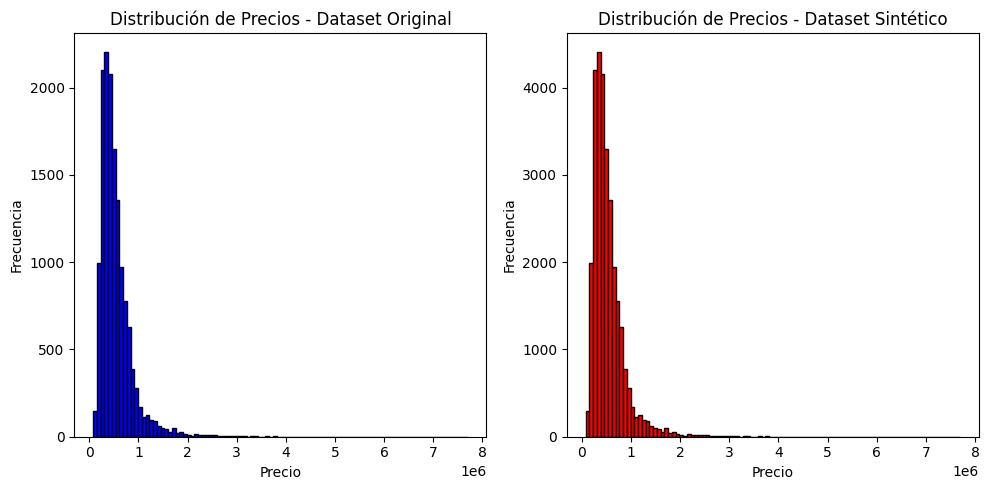

In [6]:
import matplotlib.pyplot as plt

# Configuración para visualización
plt.figure(figsize=(10, 5))

# Gráfico del dataset original
plt.subplot(1, 2, 1)
plt.hist(data['Price'], bins=100, color='blue', edgecolor='black') #histograma con 100 numeros de intervalo
plt.title('Distribución de Precios - Dataset Original')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

# Gráfico del dataset sintético
plt.subplot(1, 2, 2)
plt.hist(synthetic_dataset['Price'], bins=100, color='red', edgecolor='black')
plt.title('Distribución de Precios - Dataset Sintético')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

plt.tight_layout() # ajusta automaticamente el diseño de la grafica para que no se superpongan
plt.show()


In [7]:
# Convertir 'Tipo de Escuela' a números únicos
# 'astype('category')' convierte la columna a un tipo categórico,
# y 'cat.codes' convierte las categorías a códigos numéricos únicos.
synthetic_dataset['Tipo de Escuela'] = synthetic_dataset['Tipo de Escuela'].astype('category').cat.codes
synthetic_dataset['Estado neutral'] = synthetic_dataset['Estado neutral'].astype('category').cat.codes

synthetic_dataset

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,Clasificacion,Tipo de Escuela,Estado neutral,Cerca del Aeropuerto
0,6.762810e+09,42491.000000,5.000000,2.500000,3650.000000,9050.000000,2.000000,0.000000,4.000000,5.000000,...,-114.557000,2880.000000,5400.000000,2.000000,58.000000,2.380000e+06,4,1,2,1
1,6.762811e+09,42491.000000,4.000000,2.500000,2920.000000,4000.000000,1.500000,0.000000,0.000000,5.000000,...,-114.470000,2470.000000,4000.000000,2.000000,51.000000,1.400000e+06,4,1,2,1
2,6.762811e+09,42491.000000,5.000000,2.750000,2910.000000,9480.000000,1.500000,0.000000,0.000000,3.000000,...,-114.468000,2940.000000,6600.000000,1.000000,53.000000,1.200000e+06,4,0,4,1
3,6.762813e+09,42491.000000,4.000000,2.500000,3310.000000,42998.000000,2.000000,0.000000,0.000000,3.000000,...,-114.321000,3350.000000,42847.000000,3.000000,76.000000,8.380000e+05,4,2,4,0
4,6.762813e+09,42491.000000,3.000000,2.000000,2710.000000,4500.000000,1.500000,0.000000,0.000000,4.000000,...,-114.485000,2060.000000,4500.000000,1.000000,51.000000,8.050000e+05,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29235,6.762830e+09,42734.070322,1.985829,1.555405,1555.930781,20000.069317,0.982744,0.016014,-0.038219,4.007172,...,-114.511631,2249.950773,17285.944391,3.002478,75.981619,2.217000e+05,0,2,0,0
29236,6.762830e+09,42733.982595,2.986075,1.972668,1680.020115,6999.994526,1.450096,-0.022127,0.028378,3.975486,...,-114.498429,1540.066562,7480.020755,3.002843,58.983805,2.192001e+05,0,2,0,1
29237,6.762831e+09,42734.017188,1.980795,0.981985,1070.024979,6120.026758,0.957302,-0.124431,0.009509,3.002060,...,-114.520970,1130.024477,6119.994966,1.948927,64.019654,2.090000e+05,0,1,4,1
29238,6.762831e+09,42734.027890,4.053766,0.940728,1030.000403,6621.037092,1.007391,0.009366,-0.017322,4.043648,...,-114.473182,1419.960239,6630.931336,2.997339,54.039649,2.050000e+05,0,2,0,1


##4. Dividir los datos del dataset sintético en datos de entrenamiento y prueba

In [8]:
from sklearn.model_selection import train_test_split

# Dividir datos en entrenamiento y prueba
train_data, test_data = train_test_split(synthetic_dataset, test_size=0.2, random_state=42)
print(f'Datos de entrenamiento: {train_data.shape}')
print(f'Datos de prueba: {test_data.shape}')

# Dividimos los datos para X_test y y_test donde se utilizaran los datos para las pruebas
X_test = test_data.iloc[:, np.r_[2:23,24:27]]
y_test = test_data.iloc[:, 23]
# Dividimos los datos para X_train y y_train para el entremamiento
X_train = train_data.iloc[:, np.r_[2:23,24:27]]
y_train = train_data.iloc[:, 23]

m = y_train.size

Datos de entrenamiento: (23392, 27)
Datos de prueba: (5848, 27)


##5. Entrenar el modelo utilizando varios modelos de regresión logística por separado, considerando el numero de clases que se vinculan al dataset elegido.

In [9]:
# Creamos los vectores Y para cada clase
def datasetsCreate(y):
    data = {}
    # Convertir la Serie en un DataFrame y asignar un nombre de columna
    y = y.to_frame(name='Clasificacion')
    for i in range(5):
        # Crear un nuevo DataFrame basado en la condición de la clase actual
        data_modified = y.copy()  # Copiar el DataFrame original
        data_modified['Clasificacion'] = np.where(y['Clasificacion'] == i, 1, 0)  # Reemplazar valores
        data[f'data_{i}'] = data_modified  # Almacenar el DataFrame en el diccionario con una clave adecuada

    # Retornar los 5 DataFrames
    return data['data_0'], data['data_1'], data['data_2'], data['data_3'], data['data_4']

In [10]:
y1_train, y2_train, y3_train, y4_train, y5_train = datasetsCreate(y_train)

## Para la clase 0: y = 1, caso contrario: y = 0

In [11]:
concat1 = pd.concat([y1_train, y_train], axis=1) # concatenacion horizontal
concat1

,Clasificacion,Clasificacion
16640,0,1
26583,1,0
19669,0,1
7497,1,0
11624,0,4
...,...,...
21575,0,1
5390,0,4
860,0,2
15795,0,1


##Para la clase 1: y = 1, caso contrario: y = 0

In [12]:
concat2 = pd.concat([y2_train, y_train], axis=1)
concat2

,Clasificacion,Clasificacion
16640,1,1
26583,0,0
19669,1,1
7497,0,0
11624,0,4
...,...,...
21575,1,1
5390,0,4
860,0,2
15795,1,1


##Para la clase 2: y = 1, caso contrario: y = 0

In [13]:
concat3 = pd.concat([y3_train, y_train], axis=1)
concat3

,Clasificacion,Clasificacion
16640,0,1
26583,0,0
19669,0,1
7497,0,0
11624,0,4
...,...,...
21575,0,1
5390,0,4
860,1,2
15795,0,1


##Para la clase 3: y = 1, caso contrario: y = 0

In [14]:
concat4 = pd.concat([y4_train, y_train], axis=1)
concat4

,Clasificacion,Clasificacion
16640,0,1
26583,0,0
19669,0,1
7497,0,0
11624,0,4
...,...,...
21575,0,1
5390,0,4
860,0,2
15795,0,1


##Para la clase 4: y = 1, caso contrario: y = 0

In [15]:
concat5 = pd.concat([y5_train, y_train], axis=1)
concat5

,Clasificacion,Clasificacion
16640,0,1
26583,0,0
19669,0,1
7497,0,0
11624,1,4
...,...,...
21575,0,1
5390,1,4
860,0,2
15795,0,1


In [16]:
y1_test, y2_test, y3_test, y4_test, y5_test = datasetsCreate(y_test)
y1_test

,Clasificacion
13599,0
963,0
25666,0
1412,0
15962,0
...,...
11876,1
5503,0
16196,0
1809,0


#Realizamos la regresion logistica

##<li>Calcular la funcion sigmoidea</li>

In [17]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [18]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [19]:
# llama featureNormalize con los datos cargados
X_train_norm, mu, sigma = featureNormalize(X_train)
X_train_norm

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),...,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,Tipo de Escuela,Estado neutral,Cerca del Aeropuerto
16640,0.741489,-0.417878,0.101913,-0.198435,-0.974430,0.142503,-0.287307,2.401522,-0.555726,-0.839519,...,-0.019221,-0.632799,-0.576979,-0.268820,1.152694,0.336131,-0.444985,1.211579,-0.425885,-1.033566
26583,-0.481638,-1.515302,-0.813624,-0.204075,0.019871,0.310395,-0.398928,-0.717224,-1.458842,-0.554070,...,-0.715964,-0.534963,-1.137232,-0.210718,1.212685,-1.224094,-0.911751,1.211579,0.715796,0.967524
19669,-0.388737,-1.417105,-1.164983,-0.154924,-0.893689,-0.235783,-0.296112,0.807553,-0.553922,-0.946649,...,0.332059,0.983299,-1.108447,-0.201379,1.236440,-0.997784,-0.538312,1.211579,-1.567567,0.967524
7497,0.651005,0.474840,-0.259998,-0.228596,0.919138,-0.081842,-0.306938,0.857783,-0.585716,0.064577,...,-1.501108,1.259793,-0.203606,-0.242257,1.210321,0.229272,-0.668969,1.211579,-1.567567,-1.033566
11624,-0.402568,0.474840,0.644960,0.216406,-0.931486,-0.081842,4.860936,-0.646685,1.105433,0.326296,...,1.389649,-1.097854,0.615009,0.284738,1.210321,0.564894,1.218892,1.211579,0.715796,-1.033566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,0.695535,-0.437902,-1.175519,-0.205648,0.164891,-0.792233,-0.277690,1.062348,-1.360826,-0.958627,...,1.722231,-0.741763,-1.036652,-0.213049,1.175224,-0.669658,-0.631638,1.211579,-1.567567,0.967524
5390,-0.402568,0.151626,1.241167,4.011739,0.919138,-0.081842,-0.306938,0.857783,1.951007,1.741956,...,-0.303649,0.156359,1.749581,-0.183378,-0.013528,-1.448840,0.554941,-0.013300,-1.567567,0.967524
860,-1.456140,0.474840,-0.845559,-0.355144,0.919138,-0.081842,-0.306938,-0.646685,0.259858,-0.768164,...,0.338975,-0.652369,-0.979136,-0.431572,-1.237377,-0.441973,-0.111677,-1.238180,0.715796,0.967524
15795,0.671126,0.758496,-0.323889,-0.251468,-0.935599,-1.222524,-0.317404,-0.670889,-0.603729,-0.899051,...,-0.664499,-0.076866,-0.261024,-0.224719,-1.260031,1.014263,-0.526313,-1.238180,0.715796,-1.033566


##Función de Costo y Gradiente

Se implementa la funcion cost y gradient, para la regresión logistica. Antes de continuar es importante agregar el termino de intercepcion a X.

In [20]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X_train.shape
# Agraga el termino de intercepción a A
X_ready = np.concatenate([np.ones((m, 1)), X_train_norm], axis=1)

In [21]:
print(X_ready.shape)

(23392, 25)


## Funcion para calcular los costos
Se utiliza para calcular el costo o la función de pérdida en un modelo de regresión logística

In [22]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T)) # Predecir las probabilidades usando la función sigmoide
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) # Calcular el costo

    return J

##Funcion para calcular el descenso de gradiente
Este algoritmo minimiza la función de costo ajustando los valores de theta


In [23]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T)) # Calcula la hipótesis h utilizando la función sigmoid
        theta = theta - (alpha / m) * (h - y).dot(X) # Actualiza theta usando la regla de actualización del descenso por el gradiente

        J_history.append(calcularCosto(theta, X, y)) # Calcula el costo con los parámetros actuales y lo añade al historial
    return theta, J_history

##Realizamos pruebas para y1_train

In [24]:
y1_train = y1_train.to_numpy().ravel() # convierte ya sea de una Serie o Dataframe a un array NumPy

theta calculado por el descenso por el gradiente: [-1.39628585e+00 -4.80178650e-02 -1.68949203e-01 -1.81137437e-01
 -7.03925959e-02 -1.74065073e-01 -2.60937962e-02 -9.28711021e-02
 -9.26940031e-02 -2.95293824e-01 -1.29815439e-01 -1.35259778e-01
  5.73077682e-02 -3.21013313e-02  2.97995838e-01 -7.05139114e-01
  1.88358381e-02 -2.18926118e-01 -5.71048140e-02  6.32166123e-03
  3.01390987e-04 -4.04159904e-01  5.06443047e-03  1.43694879e-02
  1.02385251e-02]


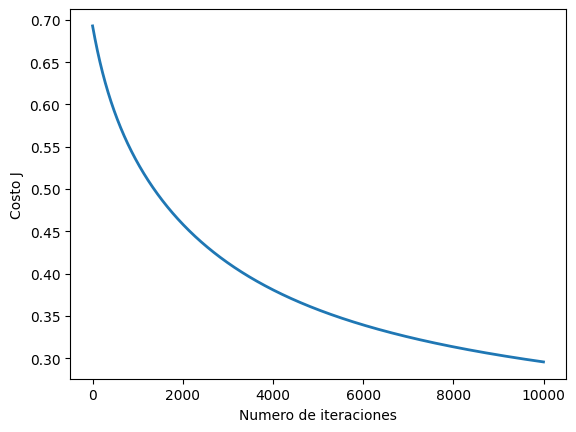

In [25]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(25)
theta, J_history = descensoGradiente(theta, X_ready, y1_train, alpha, num_iters)

# Grafica la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo J')



# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

#Realizamos pruebas

In [26]:
# Normalizamos X_test
X_test_norm = (X_test - mu) / sigma
m_test = X_test.shape[0]
X_test_norm

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),...,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,Tipo de Escuela,Estado neutral,Cerca del Aeropuerto
13599,-1.456140,0.151626,-0.760386,-0.362435,2.769761,-0.081842,-0.306938,-0.646685,-0.585716,-0.554031,...,0.789866,0.636113,-0.749349,-0.439816,-1.237377,-1.225092,-0.205003,-1.238180,0.715796,0.967524
963,-1.456140,-1.464444,-1.420473,-0.289575,-0.931486,-0.081842,-0.306938,2.362251,-2.276865,-1.232120,...,0.933842,-1.029318,-0.835519,-0.297052,1.210321,-1.672589,-0.342326,1.211579,-0.425885,0.967524
25666,0.662292,0.507845,0.942945,-0.233318,0.731574,0.157827,-0.354093,-0.639182,0.192829,1.408972,...,-1.905471,-0.556682,0.844839,-0.239808,-1.231822,1.353066,-0.444985,-1.238180,0.715796,-1.033566
1412,0.651005,2.090910,1.124055,-0.144668,1.844449,-0.081842,-0.306938,-0.646685,1.951007,1.611096,...,-0.004460,-0.049249,0.571924,-0.122632,1.210321,1.571762,2.234818,1.211579,0.715796,-1.033566
15962,-0.416123,-0.544075,-0.856283,-0.326820,-1.037582,0.296623,-0.192109,2.350570,-0.599805,-1.172623,...,1.152562,-1.276381,-1.180098,-0.383388,1.248749,0.559671,-0.213002,1.211579,-0.425885,-1.033566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11876,-0.402568,-0.494802,-0.728446,-0.358790,0.919138,-0.081842,-0.306938,-0.646685,-0.585716,-1.006090,...,0.038382,-0.686637,-0.950413,-0.440827,-1.237377,0.005523,-0.660969,-1.238180,0.715796,0.967524
5503,-0.402568,-0.494802,0.080692,-0.126414,-0.931486,-0.081842,2.276999,0.857783,-0.585716,-0.791957,...,0.179548,-0.234297,0.255967,-0.161133,-0.013528,-1.001344,0.434950,-0.013300,-1.567567,0.967524
16196,-0.376896,0.455272,0.155211,-0.295948,0.872904,-0.858655,-0.393175,-0.744314,-0.666469,0.528497,...,-0.517490,1.100497,0.356436,-0.315875,-1.162667,1.342132,-0.391656,-1.238180,0.715796,-1.033566
1809,0.651005,-0.494802,-0.409050,-0.283281,-0.006174,-0.081842,-0.306938,0.857783,-0.585716,-0.411275,...,0.112828,-0.549564,-0.103074,-0.326608,-0.013528,-1.448840,-0.005018,-0.013300,-1.567567,0.967524


In [27]:
# Concatenamos numeros unos aa cada fila o una columna de 1 al inicio
X_test_ready = np.concatenate([np.ones((m_test, 1)), X_test_norm], axis=1)
X_test_ready

array([[ 1.        , -1.45614025,  0.15162604, ..., -1.23817962,
         0.71579592,  0.96752431],
       [ 1.        , -1.45614025, -1.46444429, ...,  1.21157913,
        -0.42588539,  0.96752431],
       [ 1.        ,  0.66229249,  0.5078449 , ..., -1.23817962,
         0.71579592, -1.03356576],
       ...,
       [ 1.        , -0.37689596,  0.45527163, ..., -1.23817962,
         0.71579592, -1.03356576],
       [ 1.        ,  0.65100477, -0.49480209, ..., -0.01330025,
        -1.5675667 ,  0.96752431],
       [ 1.        , -0.38274093, -1.54159481, ..., -0.01330025,
        -1.5675667 ,  0.96752431]])

In [28]:
y_pred = [] # iniciamos la y_pred donde almacenaremos las predicciones

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready:
  y_pred.append(sigmoid(np.dot(i, theta)))

y_pred = np.array(y_pred)
y_pred

array([0.13193077, 0.32781045, 0.41328718, ..., 0.26844319, 0.29455038,
       0.6853605 ])

In [29]:
umbral = (y_pred >= 0.5).astype(int) # Una forma de redondear entre 1 y 0
umbral

array([0, 0, 0, ..., 0, 0, 1])

In [30]:
y1_test = y1_test.to_numpy().ravel() # convierte ya sea de una Serie o Dataframe a un array NumPy

In [31]:
# Crear un DataFrame
result = pd.DataFrame({'y_test': y1_test, 'prediccion': umbral})

# Mostrar el DataFrame
result

,y_test,prediccion
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
5843,1,1
5844,0,0
5845,0,0
5846,0,0


In [32]:
# Calcular la precisión con una función lambda
calcular_precision = lambda y_real, y_pred: (sum(y_real == y_pred) / y_real.shape[0]) * 100

# Calcular y mostrar la precisión del modelo
precision = calcular_precision(y1_test, umbral)
print(f"La precisión del modelo es: {precision:.2f}%")

La precisión del modelo es: 91.16%


#Hacemos la prueba con y2_train


In [33]:
y2_train = y2_train.to_numpy().ravel() # convierte ya sea de una Serie o Dataframe a un arra NumPy

theta calculado por el descenso por el gradiente: [-1.25591054e+00  3.14461540e-02 -1.34825902e-02 -9.89004213e-02
 -1.62517172e-02  2.25688195e-02  1.55154783e-03 -5.45360095e-02
 -3.97773032e-02 -1.34281385e-01 -7.62025948e-02 -6.39354184e-02
  1.67271959e-01 -3.75336793e-02  9.49792621e-02 -3.32168583e-02
 -1.00907037e-02 -1.04726322e-01 -9.66773378e-03 -1.24793987e-03
  1.68182119e-03 -3.28883397e-01 -1.46909338e-03  2.16646034e-02
 -1.12195114e-02]


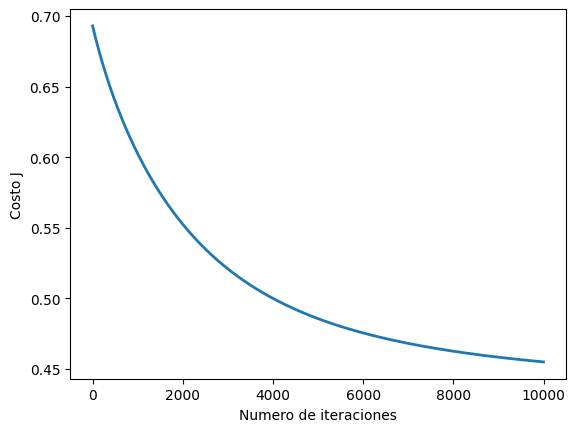

In [34]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta1 = np.zeros(25)
theta1, J_history = descensoGradiente(theta1, X_ready, y2_train, alpha, num_iters)

# Grafica la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo J')



# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta1)))

In [35]:
y_pred1 = [] # iniciamos la y_pred donde almacenaremos las predicciones

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready:
  y_pred1.append(sigmoid(np.dot(i, theta1)))

y_pred1 = np.array(y_pred1)
y_pred1

array([0.31995339, 0.26402992, 0.27400359, ..., 0.2947153 , 0.22026974,
       0.33132765])

In [36]:
umbral1 = (y_pred1 >= 0.5).astype(int) # Una forma de redondear entre 1 y 0
umbral1

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
y2_test = y2_test.to_numpy().ravel() # convierte ya sea de una Serie o Dataframe a un array NumPy
y2_test

array([0, 0, 1, ..., 1, 0, 0])

In [38]:
result1 = pd.DataFrame({'y_test': y2_test, 'prediccion': umbral1})

# Mostrar el DataFrame
result1

,y_test,prediccion
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
5843,0,0
5844,0,0
5845,1,0
5846,0,0


In [39]:
# Calcular la precisión con una función lambda
calcular_precision = lambda y_real, y_pred: (sum(y_real == y_pred) / y_real.shape[0]) * 100

# Calcular y mostrar la precisión del modelo
precision = calcular_precision(y2_test, umbral1)
print(f"La precisión del modelo es: {precision:.2f}%")

La precisión del modelo es: 79.89%


##Hacemos la prueba con y3_train

In [40]:
y3_train = y3_train.to_numpy().ravel() # convierte ya sea de una Serie o Dataframe a un arra NumPy

theta calculado por el descenso por el gradiente: [-1.18943403e+00 -2.39595666e-02  5.27067791e-02 -6.77829048e-02
  1.64131007e-02  2.77379458e-02 -1.26198625e-02 -4.63564923e-02
 -1.71589252e-02 -5.96997624e-02 -1.08572756e-01  6.11803564e-02
  6.91493920e-02 -1.91228772e-02 -1.72100881e-01  3.20152216e-01
  4.03946473e-02 -5.59844890e-02  3.74884491e-02 -7.19883365e-03
  7.91765048e-04 -1.88405148e-01 -7.51474900e-03  1.02559234e-03
  1.08050242e-02]


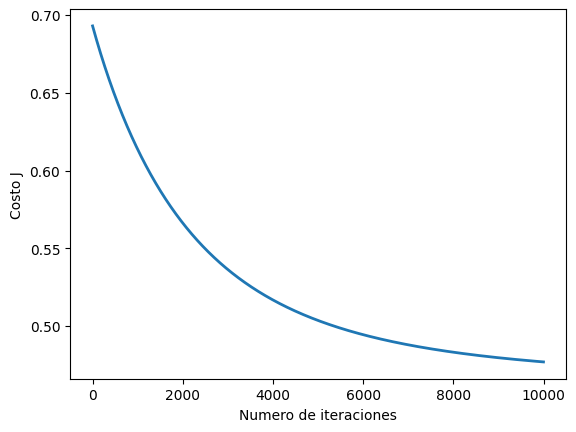

In [41]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta2 = np.zeros(25)
theta2, J_history = descensoGradiente(theta2, X_ready, y3_train, alpha, num_iters)

# Grafica la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo J')



# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta2)))

In [42]:
y_pred2 = [] # iniciamos la y_pred donde almacenaremos las predicciones

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready:
  y_pred2.append(sigmoid(np.dot(i, theta2)))

y_pred2 = np.array(y_pred2)
y_pred2

array([0.44523584, 0.38088678, 0.12061503, ..., 0.27145399, 0.19611249,
       0.18931111])

In [43]:
umbral2 = (y_pred2 >= 0.5).astype(int) # Una forma de redondear entre 1 y 0
umbral2

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
y3_test = y3_test.to_numpy().ravel() # convierte ya sea de una Serie o Dataframe a un array NumPy
y3_test

array([1, 1, 0, ..., 0, 0, 0])

In [45]:
result2 = pd.DataFrame({'y_test': y3_test, 'prediccion': umbral2})

# Mostrar el DataFrame
result2

,y_test,prediccion
0,1,0
1,1,0
2,0,0
3,0,0
4,1,0
...,...,...
5843,0,0
5844,0,0
5845,0,0
5846,0,0


In [46]:
# Calcular la precisión con una función lambda
calcular_precision = lambda y_real, y_pred: (sum(y_real == y_pred) / y_real.shape[0]) * 100

# Calcular y mostrar la precisión del modelo
precision = calcular_precision(y3_test, umbral2)
print(f"La precisión del modelo es: {precision:.2f}%")

La precisión del modelo es: 79.29%


##Hacemos la prueba con y4_train

In [47]:
y4_train = y4_train.to_numpy().ravel() # convierte ya sea de una Serie o Dataframe a un array NumPy

theta calculado por el descenso por el gradiente: [-1.20795439e+00  7.92668553e-02  4.26868467e-02 -9.96030436e-04
  3.77575598e-02  1.10662386e-01 -3.24939296e-02 -5.53029249e-02
  8.85932983e-02  6.97063341e-02 -2.92573010e-02  5.24469803e-02
 -8.05285555e-02 -8.00497029e-03 -2.95002890e-01  2.89536088e-01
  6.21082785e-02  6.92053532e-02  3.97014178e-02 -1.06096332e-02
 -2.49947311e-03 -6.80531199e-03 -9.25644785e-03 -1.30635383e-02
 -1.61105435e-02]


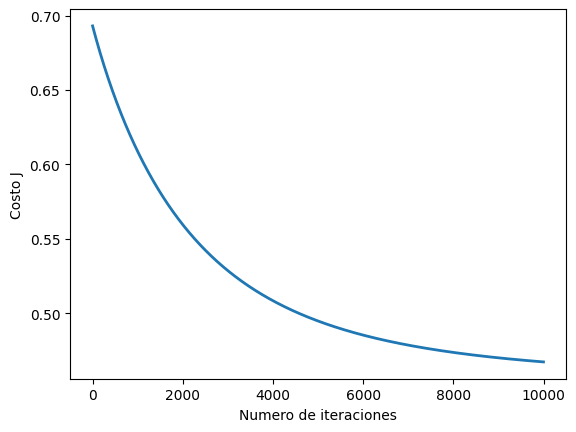

In [48]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta3 = np.zeros(25)
theta3, J_history = descensoGradiente(theta3, X_ready, y4_train, alpha, num_iters)

# Grafica la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo J')



# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta3)))

In [49]:
y_pred3 = [] # iniciamos la y_pred donde almacenaremos las predicciones

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready:
  y_pred3.append(sigmoid(np.dot(i, theta3)))

y_pred3 = np.array(y_pred3)
y_pred3

array([0.35867147, 0.31301774, 0.13375628, ..., 0.24929927, 0.20803487,
       0.11151976])

In [50]:
umbral3 = (y_pred3 >= 0.5).astype(int) # Una forma de redondear entre 1 y 0
umbral3

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
y4_test = y4_test.to_numpy().ravel() # convierte ya sea de una Serie o Dataframe a un array NumPy
y4_test

array([0, 0, 0, ..., 0, 1, 0])

In [52]:
result3 = pd.DataFrame({'y_test': y4_test, 'prediccion': umbral3})

# Mostrar el DataFrame
result3

,y_test,prediccion
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
5843,0,0
5844,1,0
5845,0,0
5846,1,0


In [53]:
# Calcular la precisión con una función lambda
calcular_precision = lambda y_real, y_pred: (sum(y_real == y_pred) / y_real.shape[0]) * 100

# Calcular y mostrar la precisión del modelo
precision = calcular_precision(y4_test, umbral3)
print(f"La precisión del modelo es: {precision:.2f}%")

La precisión del modelo es: 79.69%


##Hacemos la prueba con y5_train

In [54]:
y5_train = y5_train.to_numpy().ravel() # convierte ya sea de una Serie o Dataframe a un arra NumPy

theta calculado por el descenso por el gradiente: [-1.41517426e+00 -1.23062571e-02  1.01894079e-01  2.97652386e-01
  1.45265079e-02  3.54898299e-02  7.67002186e-02  1.99555130e-01
  8.00950446e-02  3.96420181e-01  2.84958757e-01  8.87698123e-02
 -1.94878670e-01  9.94076329e-02  3.05413664e-02  1.93163171e-01
 -1.30628730e-01  2.80098560e-01 -2.73682511e-02  1.52341543e-02
  1.16705987e-03  8.59385647e-01  1.57587593e-02 -3.45353028e-02
  4.32515552e-03]


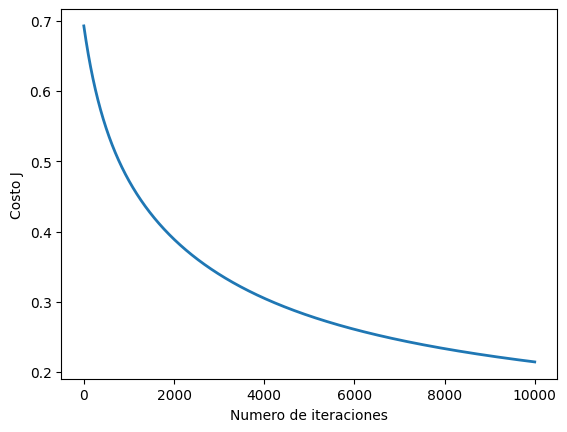

In [55]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta4 = np.zeros(25)
theta4, J_history = descensoGradiente(theta4, X_ready, y5_train, alpha, num_iters)

# Grafica la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo J')



# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta4)))

In [56]:
y_pred4 = [] # iniciamos la y_pred donde almacenaremos las predicciones

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready:
  y_pred4.append(sigmoid(np.dot(i, theta4)))

y_pred4 = np.array(y_pred4)
y_pred4

array([0.0597768 , 0.04309905, 0.18532016, ..., 0.07686327, 0.18043561,
       0.04831397])

In [57]:
umbral4 = (y_pred4 >= 0.5).astype(int) # Una forma de redondear entre 1 y 0
umbral4

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
y5_test = y5_test.to_numpy().ravel() # convierte ya sea de una Serie o Dataframe a un array NumPy
y5_test

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
result4 = pd.DataFrame({'y_test': y5_test, 'prediccion': umbral4})

# Mostrar el DataFrame
result4

,y_test,prediccion
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
5843,0,0
5844,0,0
5845,0,0
5846,0,0


In [60]:
# Calcular la precisión con una función lambda
calcular_precision = lambda y_real, y_pred: (sum(y_real == y_pred) / y_real.shape[0]) * 100

# Calcular y mostrar la precisión del modelo
precision = calcular_precision(y5_test, umbral4)
print(f"La precisión del modelo es: {precision:.2f}%")

La precisión del modelo es: 94.17%


#6. Entrenar un modelo One-vs-All.

<b>Creamos la funcion Sigmoide</b><br>
Esta transforma cualquier número real (positivo, negativo o cero) y lo transforma en un valor entre 0 y 1.

In [61]:
def sigmoide(z):
    """
    Calcula la sigmoide de z.
    """
    return 1.0 / (1.0 + np.exp(-z))

<b>Aplicamos la regularizacion</b><br>
Esta función nos devuelve 2 cosas:
- <b>El costo de la regresión logística regularizada (J):</b> Este valor mide cuán bien el modelo se ajusta a los datos
- <b>El gradiente (grad)</b>: Es un vector que indica cuánto deben ajustarse los parámetros del modelo (theta)

In [62]:
def lrCostFunction(theta, X, y, lambda_):

    # Inicializa algunos valores utiles
    m = y.size

    # convierte las etiquetas a valores enteros si son boleanos
    if y.dtype == bool:
        y = y.astype(int)

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoide(X.dot(theta.T))

    temp = theta
    temp[0] = 0

    # Calcula el costo de regresión logística
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    grad = (1 / m) * (h - y).dot(X)

    # Calcula los gradientes de regresión logística
    grad = grad + (lambda_ / m) * temp
    # Retorna el costo y los gradientes
    return J, grad

#<b>Aplicamos el descenso por el gradiente</b><br>
esta funcion implementa el algoritmo de descenso por gradiente para minimizar el costo de la regresión logística regularizada y ajustar los parámetros theta. Devuelve dos cosas:
- <b>theta (parámetros ajustados):</b> Son los parámetros finales que minimizan el costo de la función de regresión logística.
- <b>J_history (historial del costo):</b> Lista con los valores de costo por cada iteración, útil para visualizar la convergencia del modelo.

In [63]:
def gradientDescent(X, y, theta, alpha, num_iters, lambda_):

    m = y.shape[0]  # número de ejemplos
    theta = theta.copy() # Realiza una copia de theta para evitar modificar el original durante la actualización
    J_history = []  # para almacenar el costo en cada iteración

    for i in range(num_iters):
        # Calcula el costo y el gradiente usando lrCostFunction
        J, grad = lrCostFunction(theta, X, y, lambda_)

        # Actualiza los parámetros theta usando el gradiente
        theta = theta - (alpha * grad)

        # Almacena el costo en cada iteración
        J_history.append(J)

    return theta, J_history


#<b>Aplicamos la funcion de One vs All</b><br>
Implementa un algoritmo de clasificación multiclase utilizando el enfoque de uno contra todos ("one-vs-all") y el descenso por gradiente para ajustar los parámetros de un modelo de regresión logística regularizada.
la funcion nos devuelve la matriz <b><i>all_theta</i></b>, que contiene los parámetros ajustados para cada clase.

In [64]:
def oneVsAll(X, y, num_labels, lambda_, alpha, num_iters):

    m, n = X.shape
    all_theta = np.zeros((num_labels, n + 1))

    # Agregar un término de sesgo a X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    # Entrenar un clasificador para cada etiqueta
    for c in range(num_labels):
        initial_theta = np.zeros(n + 1)
        theta, J_history = gradientDescent(X, (y == c).astype(int), initial_theta, alpha, num_iters, lambda_)
        all_theta[c, :] = theta

    return all_theta

In [65]:
y_train_array = y_train.to_numpy().ravel() # convierte ya sea de una Serie o Dataframe a un array NumPy

In [66]:
num_labels = 5 # dependiendo al número de clases
lambda_ = 0.1  # parámetro de regularización
num_iters = 1000  # Número de iteraciones
alpha = 0.001  # Tasa de aprendizaje

# Entrenar el clasificador utilizando el enfoque de uno contra todos
all_theta = oneVsAll(X_train_norm, y_train_array, num_labels, lambda_, alpha, num_iters)

In [67]:
all_theta

array([[-2.89997642e-04, -4.22432509e-02, -7.54834691e-02,
        -8.08565847e-02, -1.32885719e-02, -6.03545339e-02,
        -6.56821604e-03, -2.98371580e-02, -1.25573744e-02,
        -9.87556406e-02, -6.55282382e-02, -4.62515513e-02,
        -7.19689691e-03, -1.23146338e-02,  9.32757694e-02,
        -1.60752248e-01, -3.57412536e-03, -8.10314659e-02,
        -1.18309944e-02,  8.07786109e-04, -1.47981215e-03,
        -1.07132714e-01,  6.58029106e-04, -4.65648992e-03,
         2.25773670e-03],
       [-3.04845228e-04, -1.30565082e-02, -2.24449088e-02,
        -4.26944433e-02, -8.06077696e-03, -2.81308243e-03,
        -4.91373808e-03, -2.30401478e-02, -1.44312117e-02,
        -4.41912575e-02, -3.35217241e-02, -2.64332202e-02,
         2.49240229e-02, -1.33496872e-02,  2.69779279e-02,
        -2.26967384e-02, -2.58709902e-03, -4.15299849e-02,
        -7.40178470e-03, -2.70930336e-04,  1.16650041e-03,
        -6.78128340e-02, -3.11435277e-04,  9.51381544e-03,
        -2.32642321e-03],
    

In [68]:
def predictOneVsAll(all_theta, X):
    """
    Devuelve un vector de predicciones para cada ejemplo en la matriz X.
    Tenga en cuenta que X contiene los ejemplos en filas.
    all_theta es una matriz donde la i-ésima fila es un vector theta de regresión logística entrenada para la i-ésima clase.
    Debe establecer p en un vector de valores de 0..K-1 (por ejemplo, p = [0, 2, 0, 1]
    predice clases 0, 2, 0, 1 para 4 ejemplos).
    """

    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoide(X.dot(all_theta.T)), axis = 1)

    return p


In [69]:
y_test_array = y_test.to_numpy().ravel() # convierte ya sea de una Serie o Dataframe a un array NumPy

In [70]:
print(X_test_norm.shape)
pred = predictOneVsAll(all_theta, X_test_norm)
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y_test_array) * 100))

(5848, 24)
Precision del conjuto de entrenamiento: 47.64%
